In [1]:
link_data='https://raw.githubusercontent.com/EconMsu/da_course_teachers/main/data_mining/telco_churn.csv'

In [2]:
type(link_data)

str

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загружаем базу данных по клиентам Telco


In [6]:
telco = pd.read_csv(link_data)

In [7]:
type(telco)

pandas.core.frame.DataFrame

In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


Построение сводных таблиц

In [12]:
# агрегирующие функции: среднее значение, медиана, стандартное отклонение
telco.pivot_table(values='MonthlyCharges',
                  # первый разрез: гендерная принадлежность
                  index = 'gender',
                  # агрегирующие функции
                  aggfunc=['mean', 'median', 'std'],
                  # второй разрез: наличие/отсутствие детей
                  columns=['Dependents'])

mean             median                std           
Dependents         No        Yes      No     Yes         No        Yes
gender                                                                
Female      67.622947  59.416294  74.375  61.175  29.161891  31.377721
Male        66.385928  59.622736  73.000  60.950  29.379691  31.243550

In [14]:
telco.pivot_table(values='MonthlyCharges',
                  index='Dependents', aggfunc=['mean','median','std'])

,mean,median,std
,MonthlyCharges,MonthlyCharges,MonthlyCharges
Dependents,,,
No,67.002808,73.900,29.274849
Yes,59.522156,60.975,31.301735


In [16]:
telco.pivot_table(values='MonthlyCharges', index='SeniorCitizen')

,MonthlyCharges
SeniorCitizen,
0,61.847441
1,79.820359


In [35]:
def pvt_tbl(dataframe, index_col, value_col, column_feat=None, aggfunc=['mean']):
  pivot_table = dataframe.pivot_table(values=value_col, index=index_col,
                                      columns=column_feat,
                                      aggfunc=aggfunc)

In [36]:
pvt_tbl(telco, index_col='gender', value_col='MonthlyCharges',
        column_feat=['Dependents'], aggfunc=['mean','median','std'])

In [38]:
# через цикл автоматизируем построение сводных таблиц
for feature in ['gender','Dependents','SeniorCitizen','Partner']:
  print('*'*20)
  # отображаем сводные таблицы
  print(pvt_tbl(telco, index_col=feature, value_col='MonthlyCharges'))

********************
None
********************
None
********************
None
********************
None


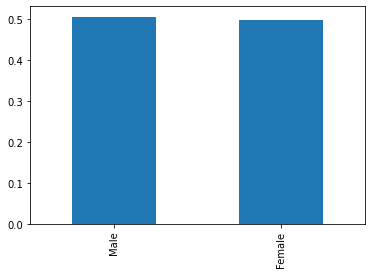

In [33]:
telco['gender'].value_counts(normalize=True).plot(kind='bar')

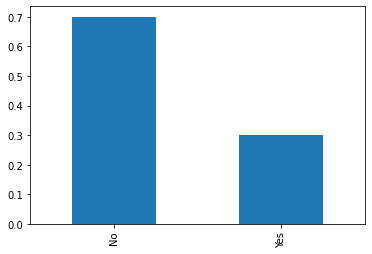

In [34]:
telco['Dependents'].value_counts(normalize=True).plot(kind='bar')

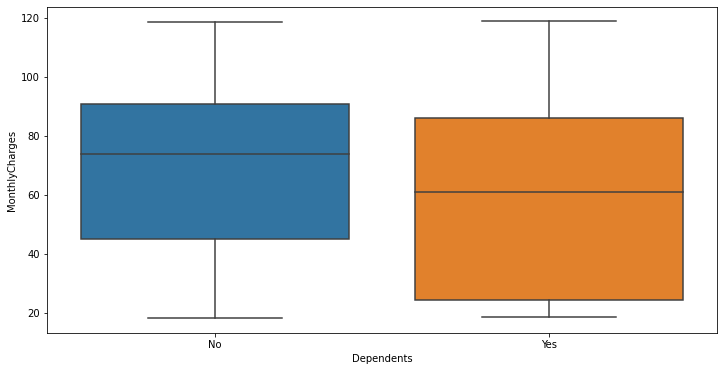

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data=telco, x='Dependents', y='MonthlyCharges')

Dependents
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MonthlyCharges, dtype: object

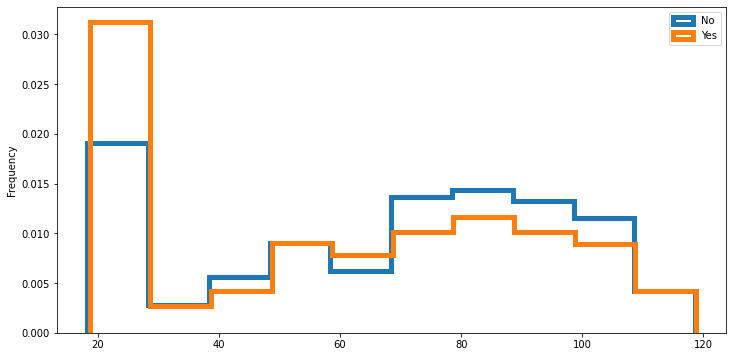

In [40]:
plt.figure(figsize=(12,6))
telco.groupby('Dependents')['MonthlyCharges'].plot(kind='hist',
                                                   histtype='step', linewidth=5, legend=True,
                                                   density=True)

Dependents
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MonthlyCharges, dtype: object

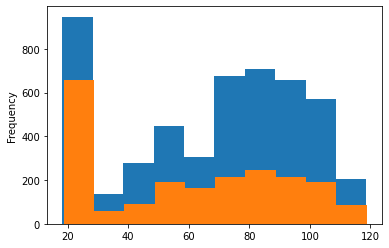

In [41]:
telco.groupby('Dependents')['MonthlyCharges'].plot(kind='hist', bins=10)

In [43]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [44]:
telco_dmms = pd.get_dummies(telco, drop_first=True)
telco_dmms

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


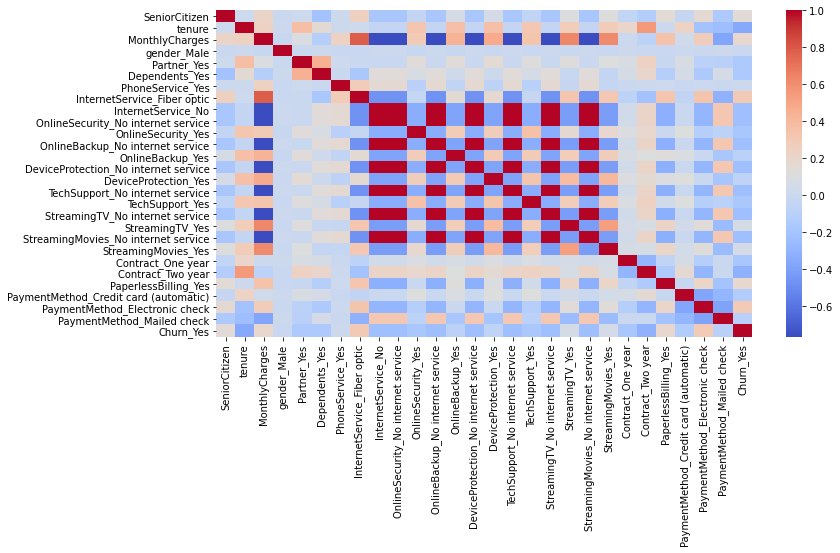

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(telco_dmms.corr(), cmap='coolwarm')

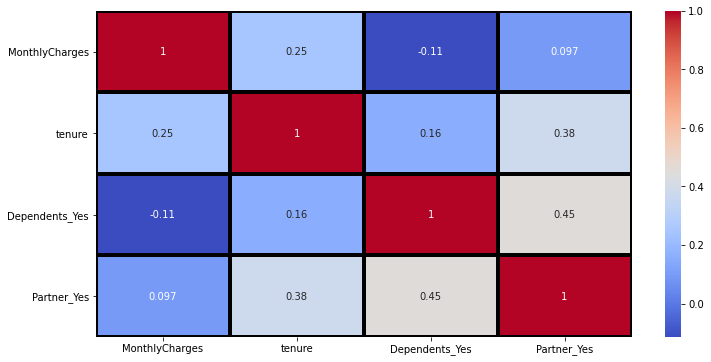

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(
    telco_dmms[['MonthlyCharges', 'tenure', 'Dependents_Yes', 'Partner_Yes']].corr(),
    annot=True, cmap='coolwarm', linewidth=3, linecolor='black')